In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [39]:
px = 12
py = 10
#c = 6
c = px*py - 4
ty = 11
tx = 15
Ly = 1
Lx = 10
epsx = Ly/(2*py)
epsy = Ly/(2*py)

N = (px-2)*(py - 2)
M_4x = px - 2
M_4y = py - 2
M = 2* M_4x + 2* M_4y
a = 2
b = 1
beta = Lx/Ly


weightss = 0*np.random.rand(2*(N+M),1).reshape(-1,1)/(2*(N+M))
weights3 = 1*np.random.rand(3*(N+M),1).reshape(-1,1)/(1*(N+M))
#weights3 = np.ones_like(weights)
wx = weights3[:(N+M)].reshape(-1,1)
wy = weights3[(N+M):2*(N+M)].reshape(-1,1)
wp = weights3[2*(N+M):3*(N+M)].reshape(-1,1)
#weights3 /= np.sum(weights3)
rho = 1.0
mu = 1.0
vm = 1.0
Re = 1.0#Ly*vm*rho/mu
pm = 10
Eu = 1 #pm /(rho*vm**2) 
#weights3[:2*(N+M)] = resultado2.x.reshape(-1,1)

In [40]:
def euclidian_distance(x,y,xyk,c):
    matrix = np.zeros([len(x)*len(y) ,c])
    number_matrix = np.zeros([len(x)*len(y),2])
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i
            m = j + i*len(y)
            matrix[m,:] = np.sqrt(np.square(x[n]- xyk[:,0])  + np.square(y[j] - xyk[:,1])) + (2.2250738585072014e-308)**(1/(2*a))
            number_matrix[m,0] = x[n]
            number_matrix[m,1] = y[j]
    return matrix, number_matrix

def points(x,y):
    matrix = np.zeros([len(x)*len(y),2])
    boundary = np.zeros([2*len(y)-4 + 2 * len(x),2])
    interior = np.zeros([(len(x) - 2) * (len(y)-2),2])
    h, u = 0,0
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i#%len(x)
            m = j + i*len(y)
            matrix[m,0] = x[n]
            matrix[m,1] = y[j]
        
            if n == 0 or n == len(x)-1 or j == 0 or j == len(y)-1:
                
                boundary[h,0] = x[n]
                boundary[h,1] = y[j]
                h+=1
            else:
                interior[u,0] = x[n]
            
                interior[u,1] = y[j]
                u+=1
    return matrix, boundary, interior

In [41]:
x = np.linspace(0,Lx,px)
y = np.linspace(0,Ly,py)

X,Y = np.meshgrid(x,y)

#Puntos internos

x_int = np.linspace(epsx ,Lx - epsx,px-2)
y_int =  np.linspace(epsy ,Ly - epsy ,py-2)
Xin,Yin = np.meshgrid(x_int,y_int)
stepx = x_int[1]- x_int[0]
stepy =y_int[1] - y_int[0]
x_subeuclidian = np.append(0,x_int)
x_subeuclidian = np.append(x_subeuclidian,Lx)
y_subeuclidian = np.append(0,y_int)
y_subeuclidian = np.append(y_subeuclidian,Ly)

#Puntos en las fronteras:
xf1, yf1 = (x_int, np.zeros(1)) # f(x,0) 
X1,Y1 = np.meshgrid(xf1 , yf1)
xf2,yf2 = (x_int, np.ones(1)*Ly) # f(x,L)
X2,Y2 = np.meshgrid(xf2 , yf2)
xf3,yf3 = (np.zeros(1), y_int ) #f(0,y)
X3,Y3 = np.meshgrid(xf3 , yf3)
xf4,yf4 = (np.ones(1)*Lx,y_int) #f(L,y)
X4,Y4 = np.meshgrid(xf4,yf4)

#Centros


xk = points(x_int,y_int)[0][:,0].reshape(-1,1)
yk = points(x_int,y_int)[0][:,1].reshape(-1,1)

xyk1 = np.concatenate((xk,yk),axis = 1)
xykf1 = np.concatenate((xf1.reshape(-1,1), np.zeros_like(xf1).reshape(-1,1)),axis = 1)
xykf2 = np.concatenate((xf2.reshape(-1,1), np.ones_like(xf2).reshape(-1,1)*Ly),axis = 1)
xykf3 = np.concatenate((np.zeros_like(yf3).reshape(-1,1),yf3.reshape(-1,1)),axis = 1)
xykf4 = np.concatenate((np.ones_like(yf4).reshape(-1,1)*Lx,yf4.reshape(-1,1)),axis = 1)
xyk1 = np.concatenate((xyk1,xykf1,xykf2,xykf3,xykf4),axis = 0)

#Puntos test
x_test = np.linspace(0,Lx,tx)
y_test = np.linspace(0,Ly,ty)
Xt,Yt = np.meshgrid(x_test,y_test)
x_vector = points(x_int,y_int)[0][:,0].reshape(-1,1)
y_vector = points(x_int,y_int)[0][:,1].reshape(-1,1)
x_vector.shape
x_v2 = euclidian_distance(x,y,xyk1,c)


print(stepx)
print(stepy)

1.0999999999999999
0.12857142857142856


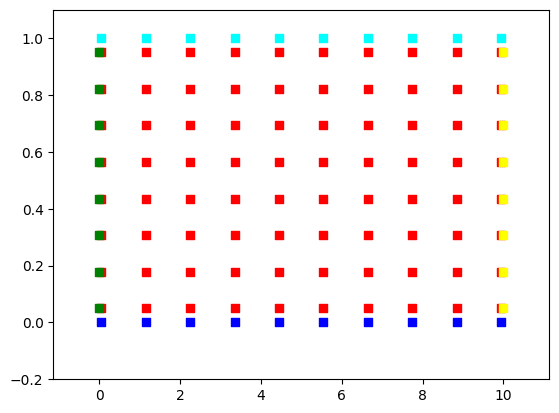

In [42]:
#Plot the colocation points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-0.3 - Lx/px,Lx + Lx/px + 0.3 ])
ax.set_ylim([-0.2,Ly*1.1])
ax.scatter(Xin,Yin,marker='s', color='red')
ax.scatter(X1,Y1,marker='s', color = 'blue')

ax.scatter(X2,Y2,marker='s', color = 'cyan')
ax.scatter(X3,Y3,marker='s', color = 'green')
ax.scatter(X4,Y4,marker = 's' ,color = 'yellow')
#ax.scatter(xyk1[:,0],xyk1[:,1], color = 'black')
plt.show()

In [43]:
def tps_rbf(euclidian_distance,a=a,b=b):
    #if euclidian_distance == 0:
    #    return 0
    #else:
    return (euclidian_distance*b)**(2*a) *np.log(b*euclidian_distance) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdx(x_vector,euclidian_distance,a=a,b=b):
        return (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)# #euclidian_distance + 1e-10 to avoid singularity at zero  
    
def tpsdy(y_vector,euclidian_distance,a=a,b=b):
        return (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1) /(euclidian_distance) * (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1)) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdxx(x_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)
                        + ((x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) + 1) + 2*a))

def tpsdyy(y_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance ) + 1)
                        + ((y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) +1) +2*a))
  

In [44]:
euclidian_dist_complete = euclidian_distance(x,y,xyk1,c)[0]
euclidian_dist_int = euclidian_distance(x_int,y_int,xyk1,c)[0]
euclidian_dist_centers = euclidian_distance(xyk1[:,0],xyk1[:,1],xyk1,c)[0]



euclidian_dist_border1 = euclidian_distance(xf1,yf1,xyk1,c)[0]
euclidian_dist_border2 = euclidian_distance(xf2,yf2,xyk1,c)[0]
euclidian_dist_border3 = euclidian_distance(xf3,yf3,xyk1,c)[0]
euclidian_dist_border4 = euclidian_distance(xf4,yf4,xyk1,c)[0]

euclidian_dist_test = euclidian_distance(x_test,y_test,xyk1,c)[0]




In [65]:
def sub_euclidian_distance(x,y, i,j):
    C = 9
    if (x[i]==0 and y[j] == 0) or (x[i] == Lx and y[j] == 0) or (x[i] == 0 and y[j] == Ly) or (x[i] == Lx and y[j] == Ly): #edges
            return 0
        
        
    elif (x[i] == 0): # b3
        print("Boundary 3")
        if(y[j] == y[-2]):
            C = 6
            sub_x_b3 = [x[i], x[i+1],x[i+2]]
            sub_y_b3 = [y[j-1], y[j]]
            print(sub_x_b3)
            print(sub_y_b3)
            sub_xk_b3 = points(sub_x_b3,sub_y_b3)[0][:,0].reshape(-1,1)
            sub_yk_b3 = points(sub_x_b3,sub_y_b3)[0][:,1].reshape(-1,1)
            sub_xyk_b3 = np.concatenate((sub_xk_b3,sub_yk_b3),1)
            return euclidian_distance([x[i]],[y[j]],sub_xyk_b3,C)[0]
        
        
        elif (y[j] == y[1]):
            C = 6
            sub_x_b3 = [x[i], x[i+1],x[i+2]]
            sub_y_b3 = [y[j], y[j+1]]
            print(sub_x_b3)
            print(sub_y_b3)
            sub_xk_b3 = points(sub_x_b3,sub_y_b3)[0][:,0].reshape(-1,1)
            sub_yk_b3 = points(sub_x_b3,sub_y_b3)[0][:,1].reshape(-1,1)
            sub_xyk_b3 = np.concatenate((sub_xk_b3,sub_yk_b3),1)
            return euclidian_distance([x[i]],[y[j]],sub_xyk_b3,C)[0]
        else :
            sub_x_b3 = [x[i], x[i+1],x[i+2]]
            sub_y_b3 = [y[j-1], y[j] , y[j+1]]
            print(sub_x_b3)
            print(sub_y_b3)
            sub_xk_b3 = points(sub_x_b3,sub_y_b3)[0][:,0].reshape(-1,1)
            sub_yk_b3 = points(sub_x_b3,sub_y_b3)[0][:,1].reshape(-1,1)
            sub_xyk_b3 = np.concatenate((sub_xk_b3,sub_yk_b3),1)
            return euclidian_distance([x[i]],[y[j]],sub_xyk_b3,C)[0]
        
        
        
    elif (y[j]==0): #b1
        print("Boundary 1")
        if(x[i]==x[1]):
            C = 6
            sub_x_b1 = [x[i], x[i+1]]
            sub_y_b1 = [y[j], y[j+1] , y[j+2]]
            print(sub_x_b1)
            print(sub_y_b1)
            sub_xk_b1 = points(sub_x_b1,sub_y_b1)[0][:,0].reshape(-1,1)
            sub_yk_b1 = points(sub_x_b1,sub_y_b1)[0][:,1].reshape(-1,1)
            sub_xyk_b1 = np.concatenate((sub_xk_b1,sub_yk_b1),1)
            return euclidian_distance([x[i]],[y[j]],sub_xyk_b1,C)[0]
        
        elif(x[i] == x[-2]):
            C = 6
            sub_x_b1 = [x[i-1], x[i]]
            sub_y_b1 = [y[j], y[j+1] , y[j+2]]
            print(sub_x_b1)
            print(sub_y_b1)
            sub_xk_b1 = points(sub_x_b1,sub_y_b1)[0][:,0].reshape(-1,1)
            sub_yk_b1 = points(sub_x_b1,sub_y_b1)[0][:,1].reshape(-1,1)
            sub_xyk_b1 = np.concatenate((sub_xk_b1,sub_yk_b1),1)
            return euclidian_distance([x[i]],[y[j]],sub_xyk_b1,C)[0]
        
        else: 
            sub_x_b1 = [x[i-1], x[i],x[i+1]]
            sub_y_b1 = [y[j], y[j+1] , y[j+2]]
            print(sub_x_b1)
            print(sub_y_b1)
            sub_xk_b1 = points(sub_x_b1,sub_y_b1)[0][:,0].reshape(-1,1)
            sub_yk_b1 = points(sub_x_b1,sub_y_b1)[0][:,1].reshape(-1,1)
            sub_xyk_b1 = np.concatenate((sub_xk_b1,sub_yk_b1),1)
            return euclidian_distance([x[i]],[y[j]],sub_xyk_b1,C)[0]
    
    elif (x[i] == Lx): #b4
        print("Boundary 4")
        if(y[j]==y[1]):
            C = 6
            sub_x_b4 = [x[i-2],x[i-1], x[i]]
            sub_y_b4 = [y[j], y[j+1]]
            print(sub_x_b4)
            print(sub_y_b4)
            sub_xk_b4 = points(sub_x_b4,sub_y_b4)[0][:,0].reshape(-1,1)
            sub_yk_b4 = points(sub_x_b4,sub_y_b4)[0][:,1].reshape(-1,1)
            sub_xyk_b4 = np.concatenate((sub_xk_b4,sub_yk_b4),1)
            return euclidian_distance([x[i]],[y[j]],sub_xyk_b4,C)[0]
        
        elif(y[j] == y[-2]):
            C = 6
            sub_x_b4 = [x[i-2],x[i-1], x[i]]
            sub_y_b4 = [y[j-1], y[j]]
            print(sub_x_b4)
            print(sub_y_b4)
            sub_xk_b4 = points(sub_x_b4,sub_y_b4)[0][:,0].reshape(-1,1)
            sub_yk_b4 = points(sub_x_b4,sub_y_b4)[0][:,1].reshape(-1,1)
            sub_xyk_b4 = np.concatenate((sub_xk_b4,sub_yk_b4),1)
            return euclidian_distance([x[i]],[y[j]],sub_xyk_b4,C)[0]
        
        else: 
            sub_x_b4 = [x[i-2], x[i-1],x[i]]
            sub_y_b4 = [y[j], y[j+1] , y[j+2]]
            print(sub_x_b4)
            print(sub_y_b1)
            sub_xk_b1 = points(sub_x_b1,sub_y_b1)[0][:,0].reshape(-1,1)
            sub_yk_b1 = points(sub_x_b1,sub_y_b1)[0][:,1].reshape(-1,1)
            sub_xyk_b1 = np.concatenate((sub_xk_b1,sub_yk_b1),1)
            return euclidian_distance([x[i]],[y[j]],sub_xyk_b1,C)[0]
            
    elif (y[j] == Ly): #b2
        print("Boundary 2")
        if(x[i] == x[1]):
            C = 6
            sub_x_b2 = [x[i], x[i+1]]
            sub_y_b2 = [y[j-2], y[j-1], y[j]]
            print(sub_x_b2)
            print(sub_y_b2)
            sub_xk_b2 = points(sub_x_b2,sub_y_b2)[0][:,0].reshape(-1,1)
            sub_yk_b2 = points(sub_x_b2,sub_y_b2)[0][:,1].reshape(-1,1)
            sub_xyk_b2 = np.concatenate((sub_xk_b2,sub_yk_b2),1)
            return euclidian_distance([x[i]],[y[j]],sub_xyk_b2,C)[0]
        
        elif(x[i] == x[-2]):
            C = 6
            sub_x_b2 = [x[i-1], x[i]]
            sub_y_b2 = [y[j-2], y[j-1], y[j]]
            print(sub_x_b2)
            print(sub_y_b2)
            sub_xk_b2 = points(sub_x_b2,sub_y_b2)[0][:,0].reshape(-1,1)
            sub_yk_b2 = points(sub_x_b2,sub_y_b2)[0][:,1].reshape(-1,1)
            sub_xyk_b2 = np.concatenate((sub_xk_b2,sub_yk_b2),1)
            return euclidian_distance([x[i]],[y[j]],sub_xyk_b2,C)[0]
        else:
            sub_x_b2 = [x[i-1], x[i],x[i+1]]
            sub_y_b2 = [y[j-2], y[j-1] , y[j]]
            print(sub_x_b2)
            print(sub_y_b2)
            sub_xk_b2 = points(sub_x_b2,sub_y_b2)[0][:,0].reshape(-1,1)
            sub_yk_b2 = points(sub_x_b2,sub_y_b2)[0][:,1].reshape(-1,1)
            sub_xyk_b2 = np.concatenate((sub_xk_b2,sub_yk_b2),1)
            return euclidian_distance([x[i]],[y[j]],sub_xyk_b2,C)[0]
        
    else:
        print("Interior")
        sub_x_int = [x[i-1] , x[i] , x[i+1]]
        sub_y_int = [y[j-1] , y[j] , y[j+1]]
        sub_xk = points(sub_x_int,sub_y_int)[0][:,0].reshape(-1,1)
        sub_yk = points(sub_x_int,sub_y_int)[0][:,1].reshape(-1,1)
        sub_xyk = np.concatenate((sub_xk,sub_yk),axis = 1)
        return euclidian_distance([x[i]],[y[j]],sub_xyk,C)[0]
print(sub_euclidian_distance(x_subeuclidian,y_subeuclidian, -1,-2).shape)
print(x_int)
print(y_int)

Boundary 4
[8.85, 9.95, 10.0]
[0.8214285714285714, 0.95]
(1, 6)
[0.05 1.15 2.25 3.35 4.45 5.55 6.65 7.75 8.85 9.95]
[0.05       0.17857143 0.30714286 0.43571429 0.56428571 0.69285714
 0.82142857 0.95      ]


In [49]:
x = x_subeuclidian
y = y_subeuclidian
i = 0
j = -2
C = 6
sub_x_b3 = [x[i], x[i+1],x[i+2]]
sub_y_b3 = [y[j-1], y[j]]

sub_xk_b3 = points(sub_x_b3,sub_y_b3)[0][:,0].reshape(-1,1)
sub_yk_b3 = points(sub_x_b3,sub_y_b3)[0][:,1].reshape(-1,1)
sub_xyk_b3 = np.concatenate((sub_xk_b3,sub_yk_b3),1)
sub_xyk_b3.shape
euclidian_distance([x[i]],[y[j]],sub_xyk_b3,C)[0]

array([[1.28571429e-01, 1.22133867e-77, 1.37951485e-01, 5.00000000e-02,
        1.15716490e+00, 1.15000000e+00]])

In [47]:
x_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,0]
y_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,1]